### This notebook will look at the effect of quantitative easing on US equities across different group of stocks like value and growth, while also bringing in a cross-asset view through gold and bitcoin in the same time period. The analysis tries to view the best performing stocks during periods of rapid money printing and liquidity injection done by the Fed. The analysis will use cross-assets as a simulus-agnostic metric to view true increase/decrease in stocks across this time period. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import performanceanalytics.statistics as pas 
import matplotlib.ticker as mtick

### Section: Data Import and Cleaning

In [2]:
BRK_price = pd.read_csv("Data/BRK-A.csv")
SPY_price = pd.read_csv("Data/SPY.csv")
SPY_daily = pd.read_csv("Data/SP500.csv")
SPY_divs = pd.read_csv("Data/SPY-dividends.csv")
VPU_price = pd.read_csv("Data/VPU.csv")
VPU_divs = pd.read_csv("Data/VPU-dividends.csv")
VTV_price = pd.read_csv("Data/VTV.csv")
VTV_divs = pd.read_csv("Data/VTV-dividends.csv")
VUG_price = pd.read_csv("Data/VUG.csv")
VUG_divs = pd.read_csv("Data/VUG-dividends.csv")
SPYG_price = pd.read_csv("Data/SPYG.csv")
SPYG_divs = pd.read_csv("Data/SPYG-dividends.csv")
SPYV_price = pd.read_csv("Data/SPYV.csv")
SPYV_divs = pd.read_csv("Data/SPYV-dividends.csv")
XLU_price = pd.read_csv("Data/XLU.csv")
XLU_divs = pd.read_csv("Data/XLU-dividends.csv")
QQQ_price = pd.read_csv("Data/QQQ.csv")
SPXT_price = pd.read_csv("Data/SPXT.csv")
SPXT_divs = pd.read_csv("Data/SPXT_divs.csv")
XLK_price = pd.read_csv("Data/XLK.csv")
Gold_price = pd.read_excel("Data/GoldPrices.xlsx")
BTC_price = pd.read_csv("Data/BTC.csv")
Gold_daily = pd.read_csv("Data/XAUUSD.csv")
T10_Yr = pd.read_csv("Data/T10YR.csv")

In [3]:
Gold_price

,Date,Price
0,1995-05-01,385.22
1,1995-06-01,387.56
2,1995-07-01,386.23
3,1995-08-01,383.67
4,1995-09-01,383.06
...,...,...
296,2020-01-01,1560.67
297,2020-02-01,1597.10
298,2020-03-01,1591.93
299,2020-04-01,1683.17


In [4]:
BTC_price['Price'] = BTC_price['Price'].str.replace(',','')
BTC_price['Actual_Price'] = pd.to_numeric(BTC_price['Price'])
Gold_price['Actual_Price'] = Gold_price['Price']
Gold_daily['Price'] = pd.to_numeric(Gold_daily['Price'])
Gold_daily['Actual_Price'] = Gold_daily['Price'] 

BTC_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3628 non-null   object 
 1   Price         3628 non-null   object 
 2   Open          3628 non-null   object 
 3   High          3628 non-null   object 
 4   Low           3628 non-null   object 
 5   Vol.          3628 non-null   object 
 6   Change %      3628 non-null   object 
 7   Actual_Price  3628 non-null   float64
dtypes: float64(1), object(7)
memory usage: 226.9+ KB


In [5]:
BRK_price['Date'] = pd.to_datetime(BRK_price['Date']) 
SPY_price['Date'] = pd.to_datetime(SPY_price['Date']) 
SPY_divs['Date'] = pd.to_datetime(SPY_divs['Date'])
SPY_daily['Date'] = pd.to_datetime(SPY_daily['Date'])
SPYG_price['Date'] = pd.to_datetime(SPYG_price['Date']) 
SPYG_divs['Date'] = pd.to_datetime(SPYG_divs['Date']) 
SPYV_price['Date'] = pd.to_datetime(SPYV_price['Date']) 
SPYV_divs['Date'] = pd.to_datetime(SPYV_divs['Date']) 
XLU_price['Date'] = pd.to_datetime(XLU_price['Date']) 
XLU_divs['Date'] = pd.to_datetime(XLU_divs['Date']) 
QQQ_price['Date'] = pd.to_datetime(QQQ_price['Date']) 
SPXT_price['Date'] = pd.to_datetime(SPXT_price['Date']) 
SPXT_divs['Date'] = pd.to_datetime(SPXT_divs['Date']) 
XLK_price['Date'] = pd.to_datetime(XLK_price['Date'])
VPU_price['Date'] = pd.to_datetime(VPU_price['Date']) 
VPU_divs['Date'] = pd.to_datetime(VPU_divs['Date']) 
VTV_price['Date'] = pd.to_datetime(VTV_price['Date']) 
VTV_divs['Date'] = pd.to_datetime(VTV_divs['Date']) 
VUG_price['Date'] = pd.to_datetime(VUG_price['Date']) 
VUG_divs['Date'] = pd.to_datetime(VUG_divs['Date']) 
Gold_price['Date'] = pd.to_datetime(Gold_price['Date']) 
BTC_price['Date'] = pd.to_datetime(BTC_price['Date']) 
Gold_daily['Date'] = pd.to_datetime(Gold_daily['Date'])
T10_Yr['Date'] = pd.to_datetime(T10_Yr['Date'])

#### Adding back dividends

In [6]:
def generate_month_year(df):
    df = df.sort_values(by='Date',ascending=True)
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

In [7]:
SPY_price = generate_month_year(SPY_price)
SPY_divs = generate_month_year(SPY_divs)

VPU_price = generate_month_year(VPU_price)
VPU_divs = generate_month_year(VPU_divs)

VTV_price = generate_month_year(VTV_price)
VTV_divs = generate_month_year(VTV_divs)

VUG_price = generate_month_year(VUG_price)
VUG_divs = generate_month_year(VUG_divs)

In [8]:
SPY_price = SPY_price.merge(SPY_divs, on=['Month','Year'], how='left')
SPY_price['Dividends'].fillna(0,inplace=True)
SPY_price['Date'] = SPY_price['Date_x']

VPU_price = VPU_price.merge(VPU_divs, on=['Month','Year'], how='left')
VPU_price['Dividends'].fillna(0,inplace=True)
VPU_price['Date'] = VPU_price['Date_x']

VTV_price = VTV_price.merge(VTV_divs, on=['Month','Year'], how='left')
VTV_price['Dividends'].fillna(0,inplace=True)
VTV_price['Date'] = VTV_price['Date_x']

VUG_price = VUG_price.merge(VUG_divs, on=['Month','Year'], how='left')
VUG_price['Dividends'].fillna(0,inplace=True)
VUG_price['Date'] = VUG_price['Date_x']

In [9]:
SPYG_price = SPYG_price.merge(SPYG_divs, left_on='Date',right_on='Date', how='left')
SPYG_price['Dividends'].fillna(0,inplace=True)

SPYV_price = SPYV_price.merge(SPYV_divs, left_on='Date',right_on='Date', how='left')
SPYV_price['Dividends'].fillna(0,inplace=True)

XLU_price = XLU_price.merge(XLU_divs, left_on='Date',right_on='Date', how='left')
XLU_price['Dividends'].fillna(0,inplace=True)

SPXT_price = SPXT_price.merge(SPXT_divs, left_on='Date',right_on='Date', how='left')
SPXT_price['Dividends'].fillna(0,inplace=True)

In [10]:
# SPY_daily = SPY_daily.merge(SPY_divs, left_on='Date',right_on='Date', how='left')
# SPY_daily['Dividends'].fillna(0,inplace=True)

#### Get the true price of stock by adding back dividends

In [11]:
# def merge_div_splits(df, df_divs, df_splits):
#     for(date in df_splits.Date):
#         if(df.Date >= pd.to_datetime(date)):
#             df['Close'] = (df['Close']*df_splits['SplitRatio'].iloc[,0])/df_splits['SplitRatio'].iloc[,1]
    
#     df = df.merge(df_divs, left_on='Date',right_on='Date', how='left')
#     df['Dividends'].fillna(0,inplace=True)
#     df['Actual_Price'] = df['Close'] + df['Dividends']
    
#     return df   

In [12]:
SPY_price['Actual_Price'] = SPY_price['Close'] + SPY_price['Dividends']
SPY_daily['Actual_Price'] = SPY_daily['Close']
VPU_price['Actual_Price'] = VPU_price['Close'] + VPU_price['Dividends']
VTV_price['Actual_Price'] = VTV_price['Close'] #+ VTV_price['Dividends']
VUG_price['Actual_Price'] = VUG_price['Close'] #+ VUG_price['Dividends']
BRK_price['Actual_Price'] = BRK_price['Close']
SPYG_price['Actual_Price'] = SPYG_price['Close']# + SPYG_price['Dividends']
SPYV_price['Actual_Price'] = SPYV_price['Close'] #+ SPYV_price['Dividends']
XLU_price['Actual_Price'] = XLU_price['Close'] #+ XLU_price['Dividends']
QQQ_price['Actual_Price'] = QQQ_price['Close']
SPXT_price['Actual_Price'] = SPXT_price['Close']# + SPXT_price['Dividends']
XLK_price['Actual_Price'] = XLK_price['Close']
T10_Yr['DailyReturn'] = T10_Yr['Close']/100
VPU_price = VPU_price.drop(['Date','Date_y','Adj Close'],axis=1)
VPU_price.head()

,Date_x,Open,High,Low,Close,Volume,Month,Year,Dividends,Actual_Price
0,2004-01-01,49.599998,49.869999,49.599998,49.840000,17600,1,2004,0.0,49.840000
1,2004-02-01,49.740002,50.549999,49.049999,50.459999,34200,2,2004,0.0,50.459999
2,2004-03-01,51.060001,51.500000,50.000000,51.049999,73400,3,2004,0.0,51.049999
3,2004-04-01,51.250000,51.400002,48.580002,49.279999,39100,4,2004,0.0,49.279999
4,2004-05-01,49.180000,49.650002,46.650002,49.650002,36900,5,2004,0.0,49.650002


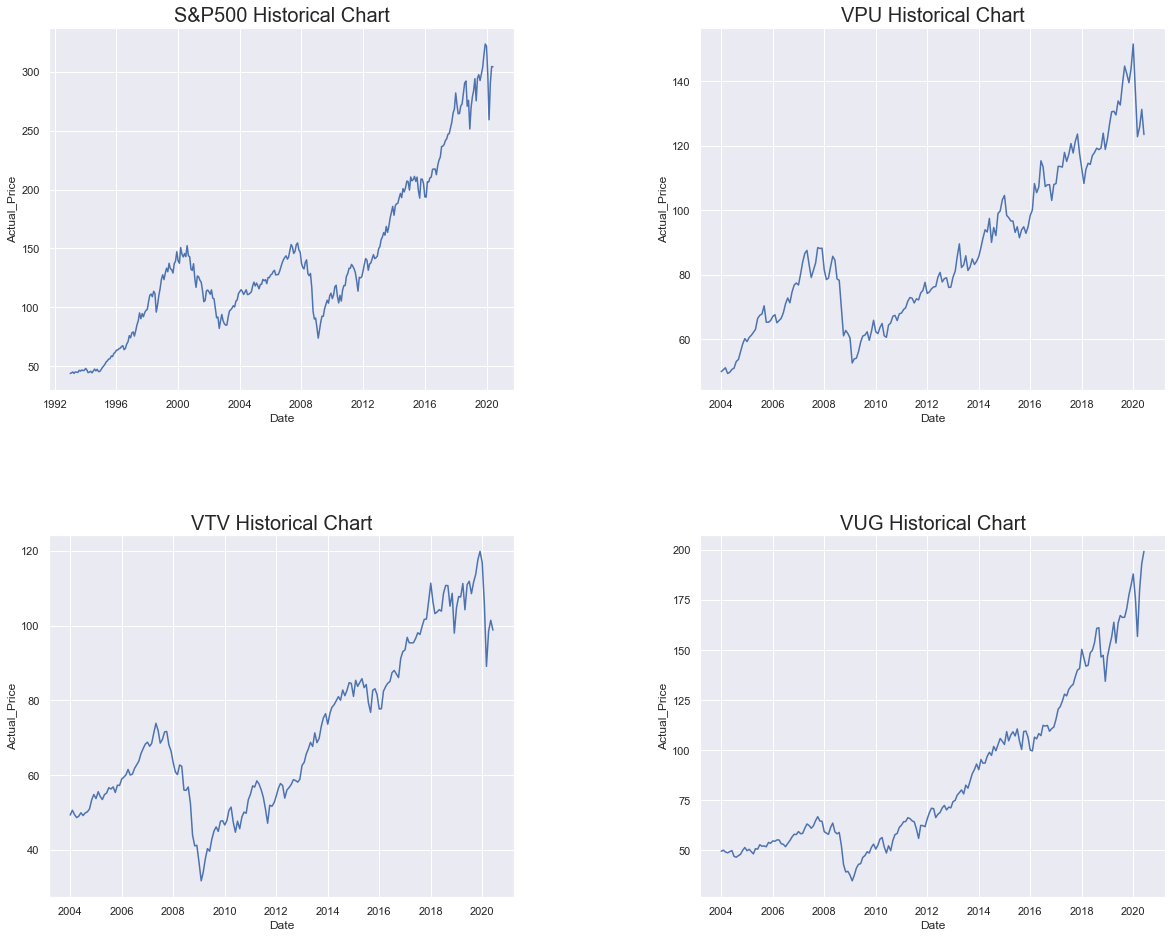

In [13]:
sns.set(rc={'figure.figsize':(20,16)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.lineplot(x='Date_x', y='Actual_Price', data=SPY_price, ax=ax).set_title('S&P500 Historical Chart', size=20)
plt.xlabel("Date")
ax = fig.add_subplot(2, 2, 2)
sns.lineplot(x='Date_x', y='Actual_Price', data=VPU_price, ax=ax).set_title('VPU Historical Chart', size=20)
plt.xlabel("Date")
ax = fig.add_subplot(2, 2, 3)
sns.lineplot(x='Date_x', y='Actual_Price', data=VTV_price, ax=ax).set_title('VTV Historical Chart', size=20)
plt.xlabel("Date")
ax = fig.add_subplot(2, 2, 4)
sns.lineplot(x='Date_x', y='Actual_Price', data=VUG_price, ax=ax).set_title('VUG Historical Chart', size=20)
plt.xlabel("Date")
plt.show()

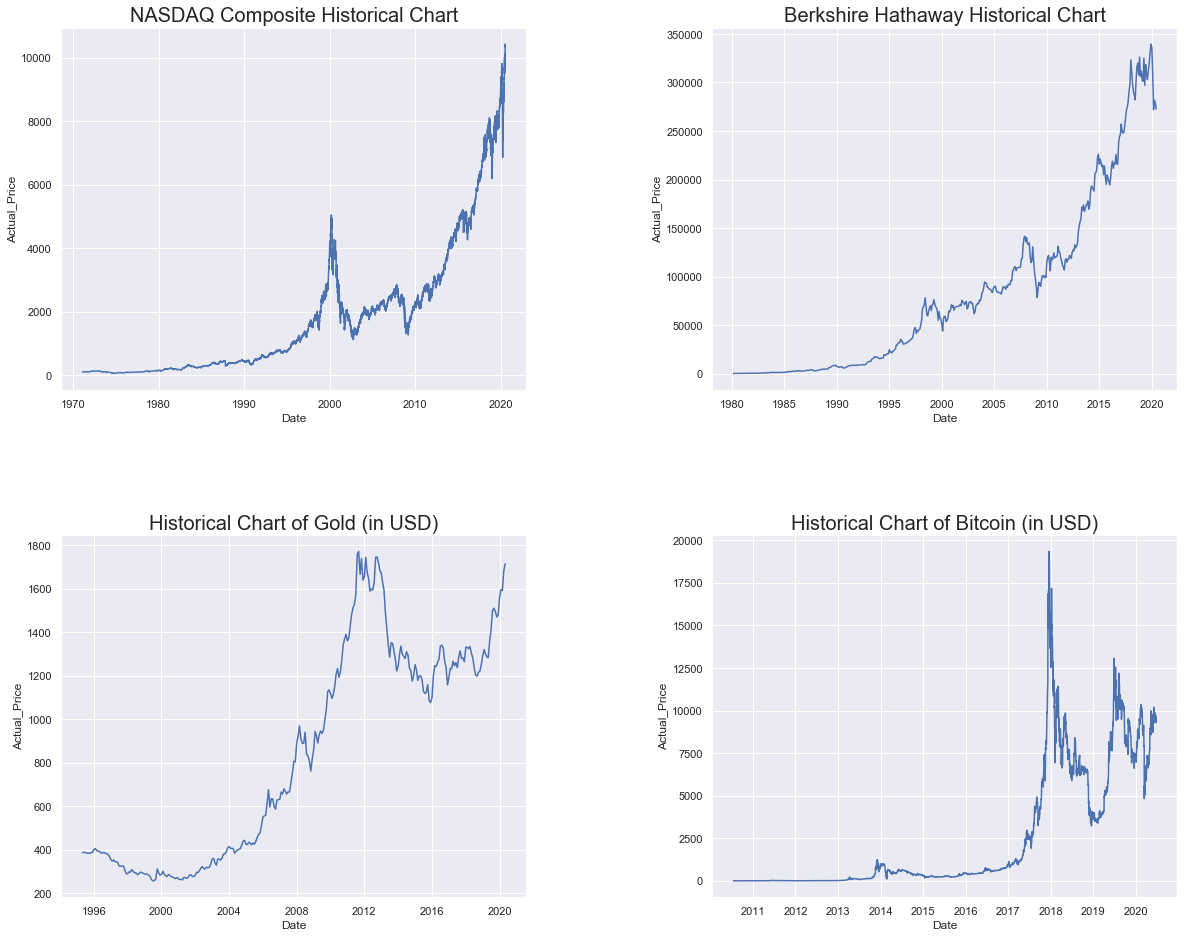

In [14]:
sns.set(rc={'figure.figsize':(20,16)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.lineplot(x='Date', y='Actual_Price', data=QQQ_price, ax=ax).set_title('NASDAQ Composite Historical Chart', size=20)
ax = fig.add_subplot(2, 2, 2)
sns.lineplot(x='Date', y='Actual_Price', data=BRK_price, ax=ax).set_title('Berkshire Hathaway Historical Chart', size=20)
ax = fig.add_subplot(2, 2, 3)
sns.lineplot(x='Date', y='Actual_Price', data=Gold_price, ax=ax).set_title('Historical Chart of Gold (in USD)', size=20)
ax = fig.add_subplot(2, 2, 4)
sns.lineplot(x='Date', y='Actual_Price', data=BTC_price, ax=ax).set_title('Historical Chart of Bitcoin (in USD)', size=20)
plt.show()

#### Import QE dates and split data accordingly

In [15]:
FED_QE = pd.read_csv("Data/FED-balance.csv")
FED_QE.columns = ['Date','Assets']
FED_QE['Date'] = pd.to_datetime(FED_QE['Date'])

Text(0, 0.5, 'Assets ($Millions)')

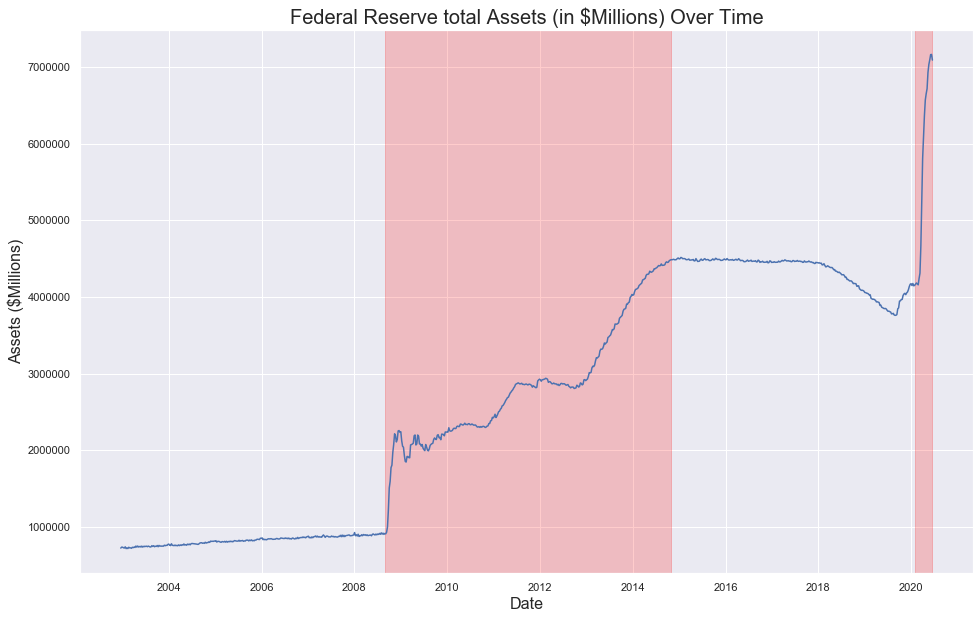

In [16]:
sns.set(rc={'figure.figsize':(16,10)})
sns.lineplot(x='Date', y='Assets',data=FED_QE).set_title('Federal Reserve total Assets (in $Millions) Over Time',size=20)
# plt.axvline(x=pd.to_datetime('2008-08-01'), color='r')
# plt.axvline(x=pd.to_datetime('2014-06-01'), color='r')
# plt.axvline(x=pd.to_datetime('2020-02-01'), color='r')
plt.axvspan(pd.to_datetime('2008-09-01'), pd.to_datetime('2014-11-01'), alpha=0.2, color='red')
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-06-11'), alpha=0.2, color='red')
plt.xlabel("Date", size=16)
plt.ylabel("Assets ($Millions)", size=16)


### Section: Split data between periods of Quantitative Easing (QE) and Quantitative Tightening (QT) and start performance comparison <br>
#### Compute compounded returns for each asset (Equities, Gold and BTC)

In [17]:
def compute_returns_2004onwards(df):
    df = df.loc[(df['Date']>=pd.to_datetime('2004-02-01')) & (df['Date']<=pd.to_datetime('2020-06-01'))]
    firstPrice = df['Actual_Price'].iloc[0]
    df['DailyReturn'] = (df['Actual_Price']- firstPrice)/firstPrice
    
    return df

In [18]:
def compute_returns(df, startDate, endDate):
    df = df.loc[(df['Date']>=pd.to_datetime(startDate)) & (df['Date']<=pd.to_datetime(endDate))]
    firstPrice = df['Actual_Price'].iloc[0]
    df['DailyReturn'] = (df['Actual_Price']- firstPrice)/firstPrice
    
    return df

In [19]:
SPY_data = compute_returns_2004onwards(SPY_price)
SPY_hist = compute_returns(SPY_price, '1995-09-01', '2020-07-01')
SPYG_data = compute_returns(SPYG_price, '1995-09-01', '2020-06-01')
SPYV_data = compute_returns(SPYV_price, '1995-09-01', '2020-06-01')
XLU_data = compute_returns(XLU_price, '1995-09-01', '2020-06-01')
Gold_hist = compute_returns(Gold_daily, '1995-09-01', '2020-07-01')
SPY_daily = compute_returns(SPY_daily, '1995-09-01', '2020-06-01')
BRK_data = compute_returns_2004onwards(BRK_price)
#VPU_data = compute_returns_2004onwards(VPU_price)
VTV_data = compute_returns_2004onwards(VTV_price)
VUG_data = compute_returns_2004onwards(VUG_price)
Gold_data = compute_returns_2004onwards(Gold_price)
BTC_data = compute_returns_2004onwards(BTC_price)

BRK_data.shape

/Users/shiva.kandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(197, 9)

In [20]:
SPY_data.shape

(197, 14)

In [21]:
def split_data(df):
    df_QT = df.loc[(df['Date'].between(pd.to_datetime('2004-02-01'),pd.to_datetime('2008-09-01'))) 
                             | (df['Date'].between(pd.to_datetime('2014-11-01'),pd.to_datetime('2020-02-01')))]
    
    df_QE = df.loc[(df['Date'].between(pd.to_datetime('2008-09-01'),pd.to_datetime('2014-11-01'))) 
                             | (df['Date'].between(pd.to_datetime('2020-02-01'),pd.to_datetime('2020-06-11')))]
    return df_QT, df_QE

In [22]:
SPY_price_QT, SPY_price_QE = split_data(SPY_price)
BRK_price_QT, BRK_price_QE = split_data(BRK_price)
#VPU_price_QT, VPU_price_QE = split_data(VPU_price)
VTV_price_QT, VTV_price_QE = split_data(VTV_price)
VUG_price_QT, VUG_price_QE = split_data(VUG_price)

VUG_price_QE.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Month,Year,Date_y,Dividends,Date,Actual_Price
56,2008-09-01,59.459999,61.500000,49.570000,52.209999,44.884785,15254100,9,2008,2008-09-24,0.138,2008-09-01,52.209999
57,2008-10-01,51.520000,51.759998,36.500000,42.910000,36.985111,27700000,10,2008,NaT,0.000,2008-10-01,42.910000
58,2008-11-01,42.900002,44.290001,32.900002,39.189999,33.778744,20874200,11,2008,NaT,0.000,2008-11-01,39.189999
59,2008-12-01,38.090000,40.020000,35.650002,39.509998,34.054569,25282300,12,2008,2008-12-22,0.168,2008-12-01,39.509998
60,2009-01-01,39.490002,41.560001,36.540001,37.580002,32.530735,20501600,1,2009,NaT,0.000,2009-01-01,37.580002


In [23]:
# pas.vol(SPY_data['DailyReturn'])

In [24]:
#def compute_ratios(df1,df2)

/Users/shiva.kandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Comparing Value vs. Growth in the S&P500')

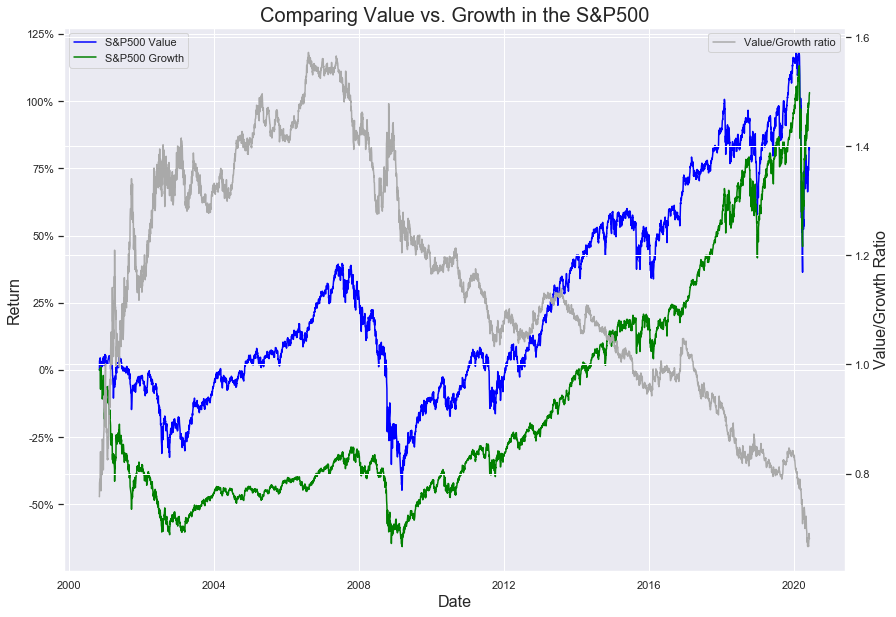

In [25]:
SPYG_base = compute_returns(SPYG_price, '2000-11-01', '2020-06-01')
SPYV_base = compute_returns(SPYV_price, '2000-11-01', '2020-06-01')
sns.set(rc={'figure.figsize':(14,10)})
fig,ax = plt.subplots()
ax.plot(SPYV_base.Date, SPYV_base.DailyReturn, color="blue", label='S&P500 Value')
ax.plot(SPYG_base.Date, SPYG_base.DailyReturn, color="green", label='S&P500 Growth')
ax.set_xlabel("Date",size=16)
ax.set_ylabel("Return", size=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
growth_val = pd.DataFrame({"Date":SPYV_base['Date'],"Ratio":SPYV_base['Actual_Price']/SPYG_base['Actual_Price']})
ax2 = ax.twinx()
ax2.plot(growth_val.Date, growth_val.Ratio, color='darkgray', label='Value/Growth ratio')
#ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.set_ylabel("Value/Growth Ratio", size=16)
ax2.legend(loc='upper right')
ax.legend(loc='upper left')
plt.title("Comparing Value vs. Growth in the S&P500",size=20)

In [26]:
BRK_SPY = pd.DataFrame({"Date":VTV_price['Date'],"Ratio":SPY_data['Actual_Price']/BRK_data['Actual_Price']})
BRK_SPY
# plt.plot(SPY_data['Date'], (BRK_data['Actual_Price']/SPY_data['Actual_Price']), color='blue')

,Date,Ratio
0,2004-01-01,NaN
1,2004-02-01,NaN
2,2004-03-01,NaN
3,2004-04-01,NaN
4,2004-05-01,NaN
...,...,...
479,NaT,NaN
480,NaT,NaN
481,NaT,NaN
482,NaT,NaN


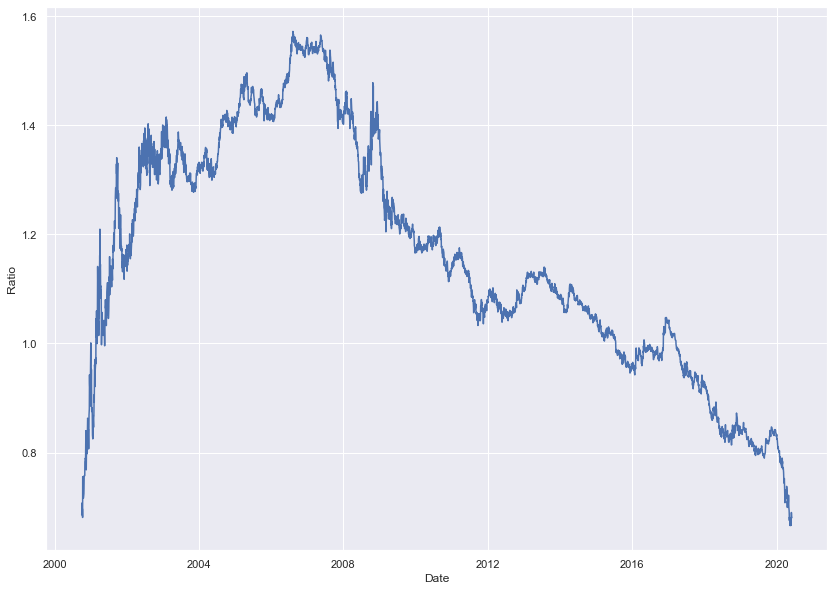

In [27]:
growth_val_daily = pd.DataFrame({"Date":SPYG_data['Date'],"Ratio":SPYV_data['Actual_Price']/SPYG_data['Actual_Price']})
sns.lineplot(x='Date',y='Ratio',data=growth_val_daily)

In [28]:
def merge_loc_ret(StartDate, EndDate, df_left, df_right):
    df_left = df_left.loc[(df_left['Date'] >= pd.to_datetime(StartDate))&(df_left['Date'] <= pd.to_datetime(EndDate))]
    df_right = df_right.loc[(df_right['Date'] >= pd.to_datetime(StartDate))&(df_right['Date'] <= pd.to_datetime(EndDate))]
    merged = df_left.merge(df_right, left_on='Date', right_on='Date', how='left')
    
    return merged

In [29]:
# Gold_hist_1996.head(1000000)

Text(0.5, 0, 'Date')

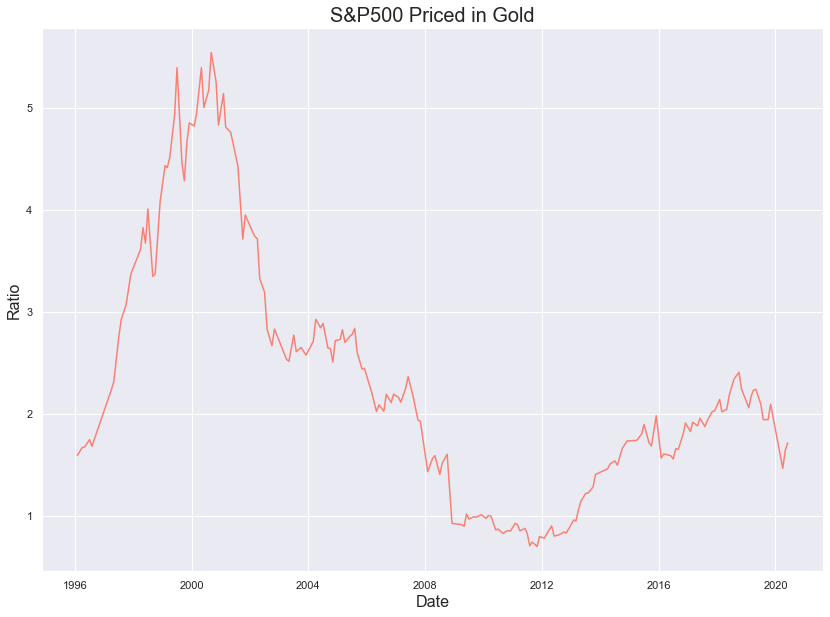

In [30]:
#Gold_vs_SPY = Gold_hist.merge(SPY_hist, left_on='Date',right_on='Date')
# Gold_hist_1996 = Gold_hist.loc[(Gold_hist['Date'] >= pd.to_datetime('1996-01-01'))&(Gold_hist['Date'] <= pd.to_datetime('2020-06-01'))]
# SPY_price_1996 = SPY_daily.loc[(SPY_daily['Date'] >= pd.to_datetime('1996-01-01'))&(SPY_daily['Date'] <= pd.to_datetime('2020-06-01'))]

# Gold_vs_SPY = SPY_price_1996.merge(Gold_hist_1996, left_on='Date', right_on='Date', how='left')
sns.set(rc={'figure.figsize':(14,10)})
Gold_vs_SPY = merge_loc_ret('1996-01-01','2020-06-15',SPY_daily,Gold_hist)
Gold_vs_SPY['Ratio'] = Gold_vs_SPY['Actual_Price_x']/Gold_vs_SPY['Actual_Price_y']
Gold_vs_SPY['Inverse_Ratio'] = Gold_vs_SPY['Actual_Price_y']/Gold_vs_SPY['Actual_Price_x']
sns.lineplot(x='Date',y='Ratio',data=Gold_vs_SPY, color='salmon')
plt.title('S&P500 Priced in Gold', size=20)
plt.ylabel('Ratio',size=16)
plt.xlabel('Date',size=16)
# sns.lineplot(x='Date',y='Inverse_Ratio',data=Gold_vs_SPY)

In [31]:
Gold_vs_SPY['SMA_Gold_SPY_200Day'] = Gold_vs_SPY['Inverse_Ratio'].rolling(window=200).mean()
Gold_vs_SPY['SMA_Gold_SPY_50Month'] = Gold_vs_SPY['Inverse_Ratio'].rolling(window=1521).mean()

Gold_vs_SPY['EMA_Gold_SPY_200Day'] = Gold_vs_SPY['Inverse_Ratio'].ewm(span=200,adjust=False).mean()
Gold_vs_SPY['EMA_Gold_SPY_50Month'] = Gold_vs_SPY['Inverse_Ratio'].ewm(span=1521,adjust=False).mean()
# df_T['EMA'] = df_T.iloc[:,0].ewm(span=40,adjust=False).mean()

Text(0, 0.5, 'Ratio')

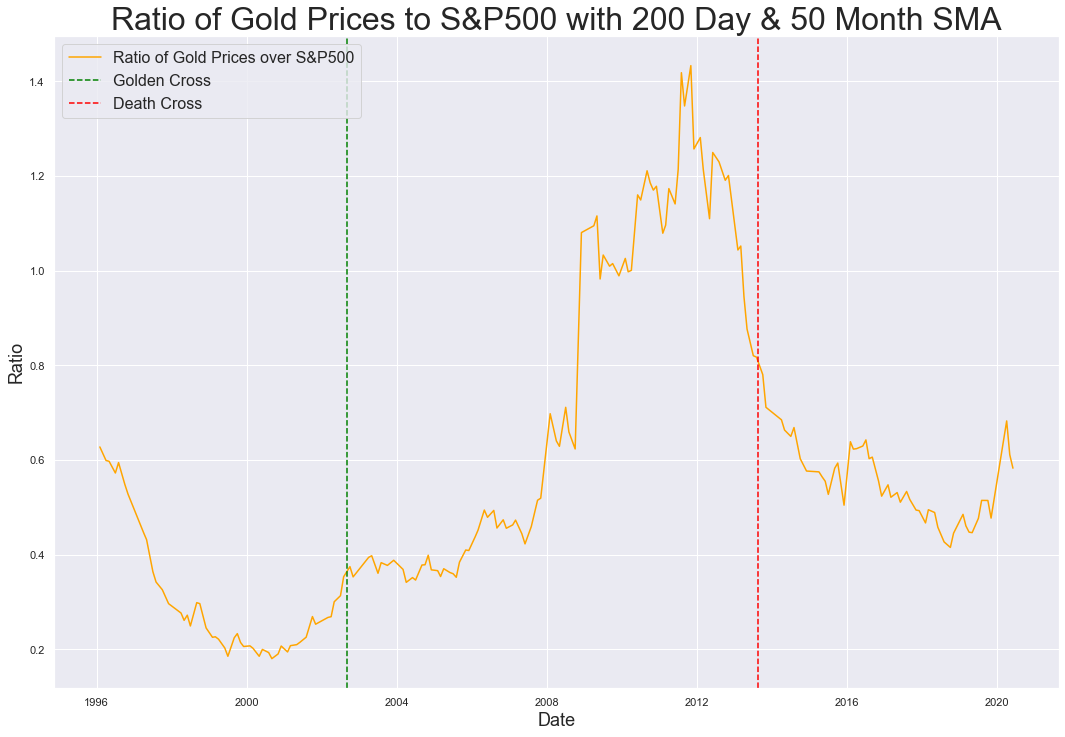

In [32]:
sns.set(rc={'figure.figsize':(18,12)})
# plt.style.use('fivethirtyeight')
sns.lineplot(x='Date',y='SMA_Gold_SPY_200Day',data=Gold_vs_SPY, color='red', label='200 Day SMA')
sns.lineplot(x='Date',y='SMA_Gold_SPY_50Month',data=Gold_vs_SPY, color='blue', label = '50 Month SMA')
sns.lineplot(x='Date',y='Inverse_Ratio',data=Gold_vs_SPY, color='orange', label='Ratio of Gold Prices over S&P500')
plt.title("Ratio of Gold Prices to S&P500 with 200 Day & 50 Month SMA", size=32)
# plt.legend(loc='upper left', fontsize=16)
plt.axvline(pd.to_datetime('2002-9-01'), color='green', label='Golden Cross', linestyle='--')
plt.axvline(pd.to_datetime('2013-08-15'), color='red', linestyle='--', label='Death Cross')
plt.legend(loc='upper left', fontsize=16)
plt.xlabel("Date", size=18)
plt.ylabel("Ratio", size=18)
#plt.show()

Text(0, 0.5, 'Ratio')

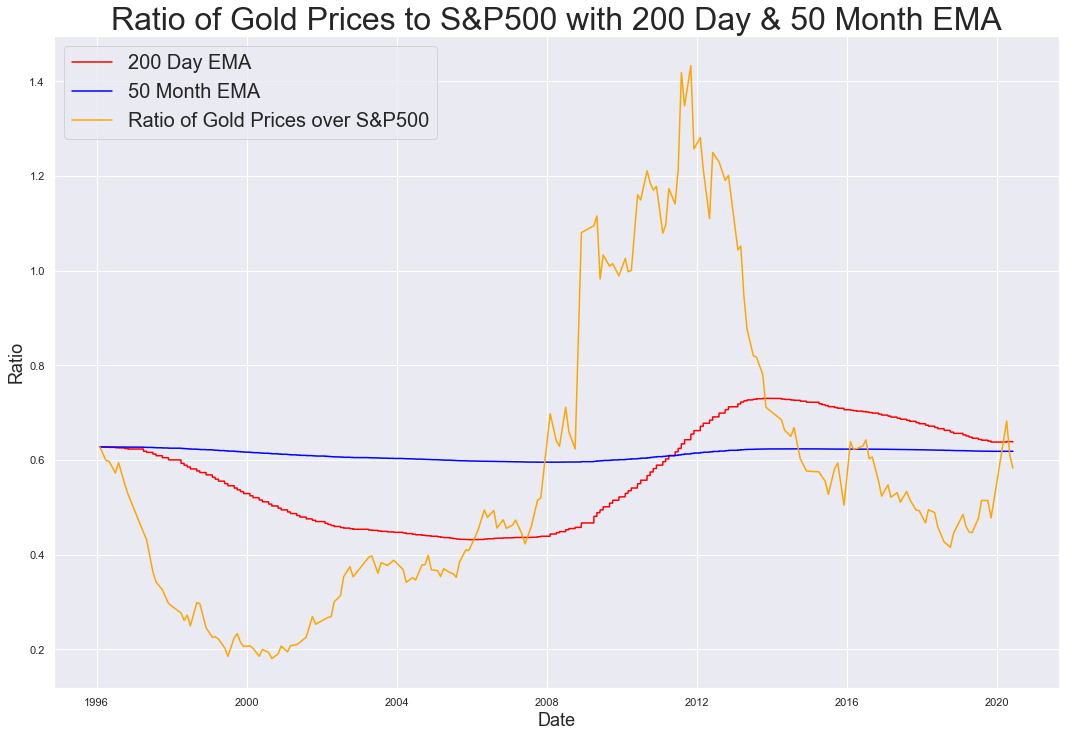

In [33]:
sns.set(rc={'figure.figsize':(18,12)})
# plt.style.use('fivethirtyeight')
sns.lineplot(x='Date',y='EMA_Gold_SPY_200Day',data=Gold_vs_SPY, color='red', label='200 Day EMA')
sns.lineplot(x='Date',y='EMA_Gold_SPY_50Month',data=Gold_vs_SPY, color='blue', label = '50 Month EMA')
sns.lineplot(x='Date',y='Inverse_Ratio',data=Gold_vs_SPY, color='orange', label='Ratio of Gold Prices over S&P500')
plt.title("Ratio of Gold Prices to S&P500 with 200 Day & 50 Month EMA", size=32)
plt.legend(loc='upper left', fontsize=20)
plt.xlabel("Date", size=18)
plt.ylabel("Ratio", size=18)
# plt.yaxis.set_major_formatter(mtick.PercentFormatter())=

In [34]:
SPYG_QE1 = compute_returns(SPYG_price, '2008-06-01', '2015-02-01')
SPYV_QE1 = compute_returns(SPYV_price, '2008-06-01', '2015-02-01')
# T10_QE1 = T10_Yr.loc[(T10_Yr['Date']>='2008-06-02')&(T10_Yr['Date']<='2015-02-01')]
#T10_QE1 = merge_loc_ret('2008-06-01', '2015-02-01',SPY_QE1, T10_Yr)

SPYG_QT1 = compute_returns(SPYG_price, '2015-02-01', '2020-01-01')
SPYV_QT1 = compute_returns(SPYV_price, '2015-02-01', '2020-01-01')
#T10_QT1 = T10_Yr.loc[(T10_Yr['Date']>='2015-02-01')&(T10_Yr['Date']<='2020-01-01')]

SPYG_QT0 = compute_returns(SPYG_price, '2001-02-01', '2008-06-01')
SPYV_QT0 = compute_returns(SPYV_price, '2001-02-01', '2008-06-01')
#T10_QT0 = T10_Yr.loc[(T10_Yr['Date']>='2001-02-01')&(T10_Yr['Date']<='2008-06-01')]

SPYG_QE2 = compute_returns(SPYG_price, '2020-01-01', '2020-06-01')
SPYV_QE2 = compute_returns(SPYV_price, '2020-01-01', '2020-06-01')
#T10_QE2 = T10_Yr.loc[(T10_Yr['Date']>='2020-01-01')&(T10_Yr['Date']<='2020-06-01')]

/Users/shiva.kandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
# T10_QE1.head()

In [36]:
SPYG_QE1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Actual_Price,DailyReturn
1925,2008-06-02,14.440,14.450,14.2825,14.3675,12.062290,541200,0.0,14.3675,0.000000
1926,2008-06-03,14.375,14.480,14.2275,14.3300,12.030811,208800,0.0,14.3300,-0.002610
1927,2008-06-04,14.345,14.470,14.3050,14.3675,12.062290,65600,0.0,14.3675,0.000000
1928,2008-06-05,14.410,14.665,14.4100,14.6650,12.312058,85200,0.0,14.6650,0.020706
1929,2008-06-06,14.565,14.590,14.2800,14.2800,11.988829,128400,0.0,14.2800,-0.006090


In [37]:
#pas.sharpe_ratio(T10_QE1['DailyReturn_x'],0.02)

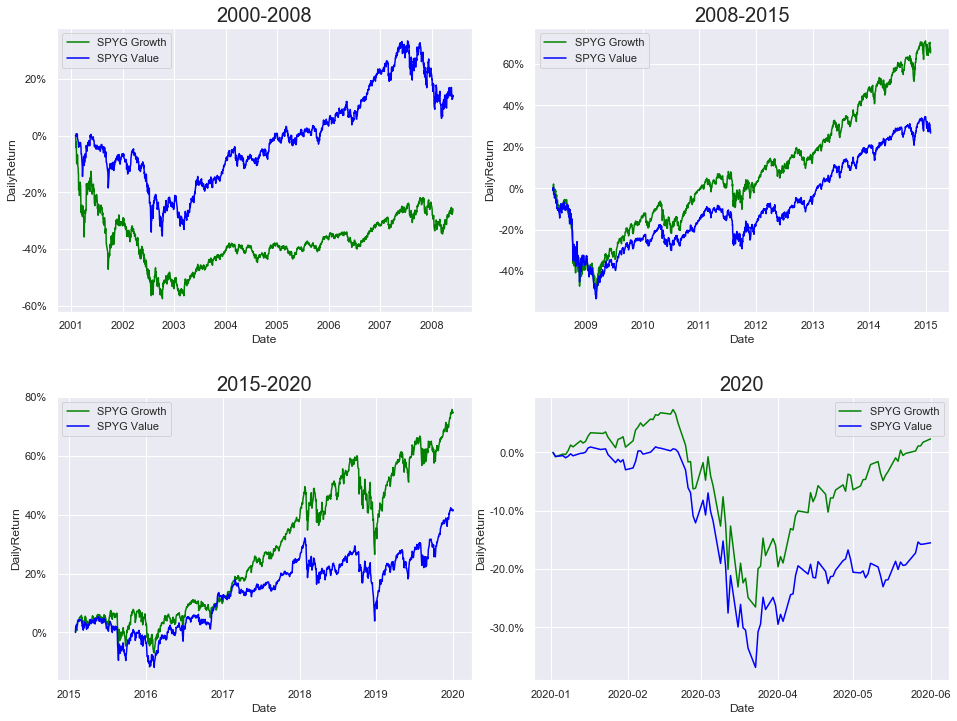

In [38]:
sns.set(rc={'figure.figsize':(16,12)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.15)
ax = fig.add_subplot(2, 2, 1)
sns.lineplot(x='Date', y='DailyReturn', data=SPYG_QT0, ax=ax, color='green', label='SPYG Growth').set_title('2000-2008', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=SPYV_QT0, ax=ax, color='blue', label='SPYG Value')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax = fig.add_subplot(2, 2, 2)
sns.lineplot(x='Date', y='DailyReturn', data=SPYG_QE1, ax=ax, color='green', label='SPYG Growth').set_title('2008-2015', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=SPYV_QE1, ax=ax, color='blue', label='SPYG Value')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax = fig.add_subplot(2, 2, 3)
sns.lineplot(x='Date', y='DailyReturn', data=SPYG_QT1, ax=ax, color='green', label='SPYG Growth').set_title('2015-2020', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=SPYV_QT1, ax=ax, color='blue', label='SPYG Value')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax = fig.add_subplot(2, 2, 4)
sns.lineplot(x='Date', y='DailyReturn', data=SPYG_QE2, ax=ax, color='green', label='SPYG Growth').set_title('2020', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=SPYV_QE2, ax=ax, color='blue', label='SPYG Value')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

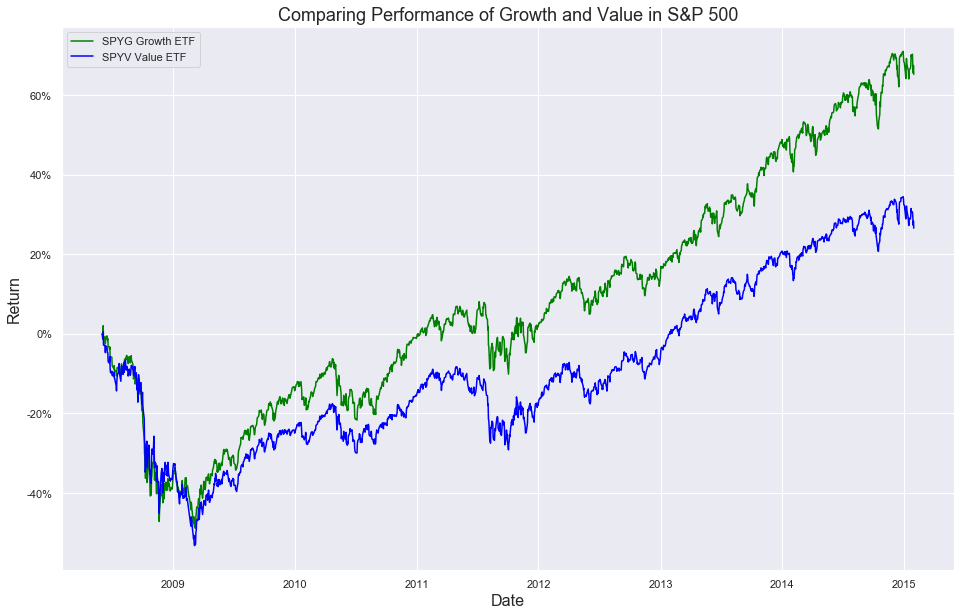

In [39]:
sns.set(rc={'figure.figsize':(16,10)})
fig,ax = plt.subplots()
ax.plot(SPYG_QE1.Date, SPYG_QE1.DailyReturn, color="green", label='SPYG Growth ETF')
ax.plot(SPYV_QE1.Date, SPYV_QE1.DailyReturn, color="blue", label='SPYV Value ETF')
plt.legend(loc='upper left')
plt.title("Comparing Performance of Growth and Value in S&P 500", size=18)
plt.xlabel('Date',size=16)
plt.ylabel('Return',size=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='upper left')

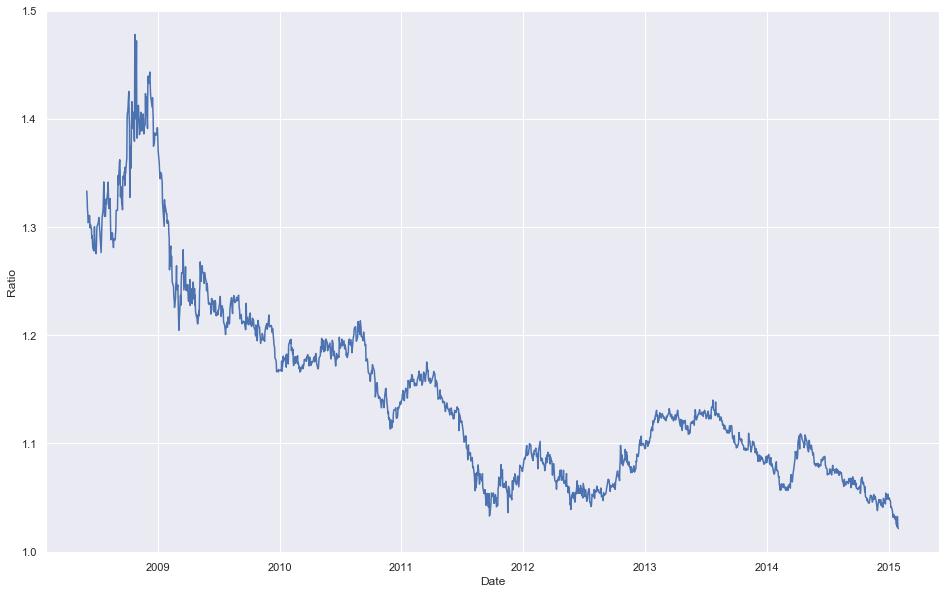

In [40]:
growth_val_QE = pd.DataFrame({"Date":SPYG_QE1['Date'],"Ratio":SPYV_QE1['Actual_Price']/SPYG_QE1['Actual_Price']})
sns.lineplot(x='Date',y='Ratio',data=growth_val_QE)
plt.show()

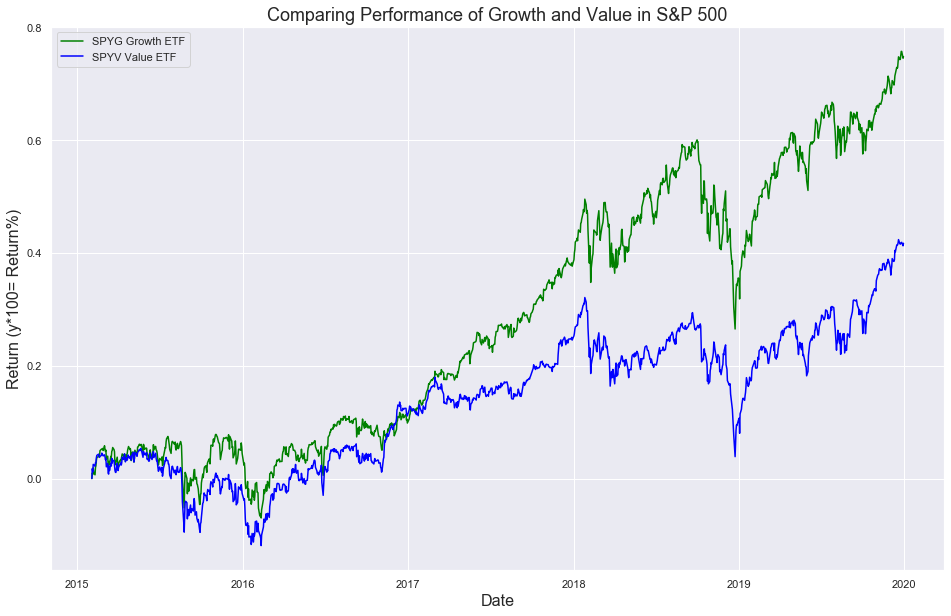

In [41]:
sns.set(rc={'figure.figsize':(16,10)})
fig,ax = plt.subplots()
# plt.style.use()
ax.plot(SPYG_QT1.Date, SPYG_QT1.DailyReturn, color="green", label='SPYG Growth ETF')
ax.plot(SPYV_QT1.Date, SPYV_QT1.DailyReturn, color="blue",label='SPYV Value ETF')
plt.legend(loc='upper left')
plt.title("Comparing Performance of Growth and Value in S&P 500", size=18)
plt.xlabel('Date',size=16)
plt.ylabel('Return (y*100= Return%)',size=16)
plt.legend(loc='upper left')

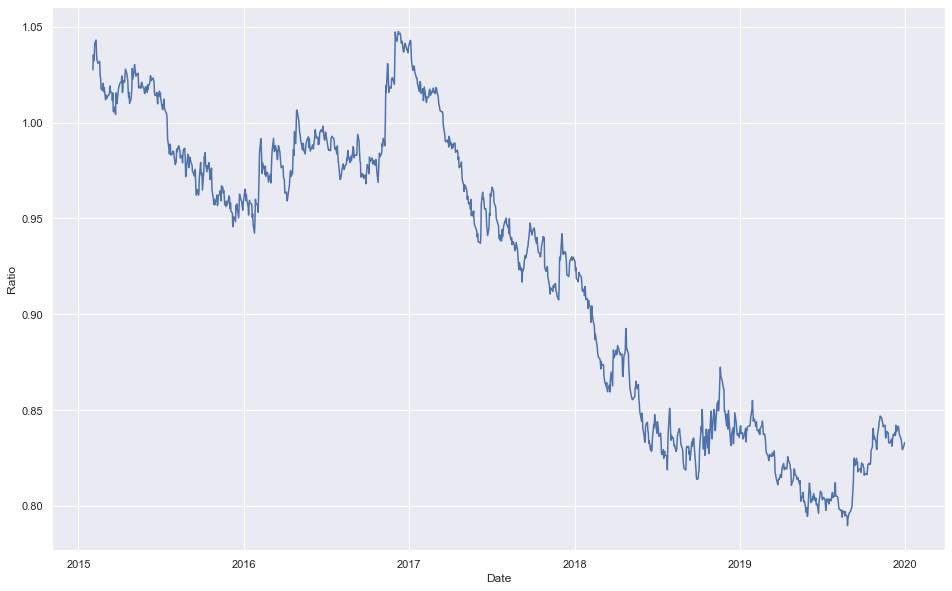

In [42]:
growth_val_QT = pd.DataFrame({"Date":SPYG_QT1['Date'],"Ratio":SPYV_QT1['Actual_Price']/SPYG_QT1['Actual_Price']})
sns.lineplot(x='Date',y='Ratio',data=growth_val_QT)

In [43]:
SPY_QE1 = compute_returns(SPY_daily, '2008-06-01', '2015-02-01')
Gold_QE1 = compute_returns(Gold_daily, '2008-06-01', '2015-02-01')

SPY_QT1 = compute_returns(SPY_daily, '2015-02-01', '2020-01-01')
Gold_QT1 = compute_returns(Gold_daily, '2015-02-01', '2020-01-01')

SPY_QT0 = compute_returns(SPY_daily, '2001-02-01', '2008-06-01')
Gold_QT0 = compute_returns(Gold_daily, '2001-02-01', '2008-06-01')

SPY_QE2 = compute_returns(SPY_daily, '2020-01-01', '2020-06-01')
Gold_QE2 = compute_returns(Gold_daily, '2020-01-01', '2020-06-01')


/Users/shiva.kandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


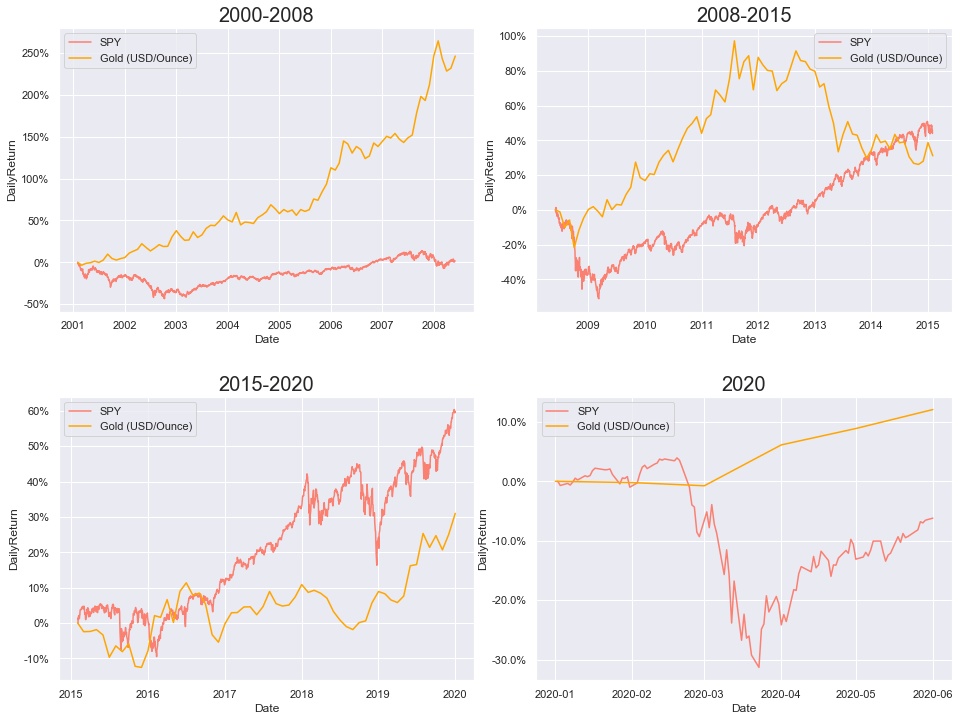

In [44]:
sns.set(rc={'figure.figsize':(16,12)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.15)
ax = fig.add_subplot(2, 2, 1)
sns.lineplot(x='Date', y='DailyReturn', data=SPY_QT0, ax=ax, color='salmon', label='SPY').set_title('2000-2008', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=Gold_QT0, ax=ax, color='orange', label='Gold (USD/Ounce)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax = fig.add_subplot(2, 2, 2)
sns.lineplot(x='Date', y='DailyReturn', data=SPY_QE1, ax=ax, color='salmon', label='SPY').set_title('2008-2015', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=Gold_QE1, ax=ax, color='orange', label='Gold (USD/Ounce)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax = fig.add_subplot(2, 2, 3)
sns.lineplot(x='Date', y='DailyReturn', data=SPY_QT1, ax=ax, color='salmon', label='SPY').set_title('2015-2020', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=Gold_QT1, ax=ax, color='orange', label='Gold (USD/Ounce)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax = fig.add_subplot(2, 2, 4)
sns.lineplot(x='Date', y='DailyReturn', data=SPY_QE2, ax=ax, color='salmon', label='SPY').set_title('2020', size=20)
sns.lineplot(x='Date', y='DailyReturn', data=Gold_QE2, ax=ax, color='orange', label='Gold (USD/Ounce)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


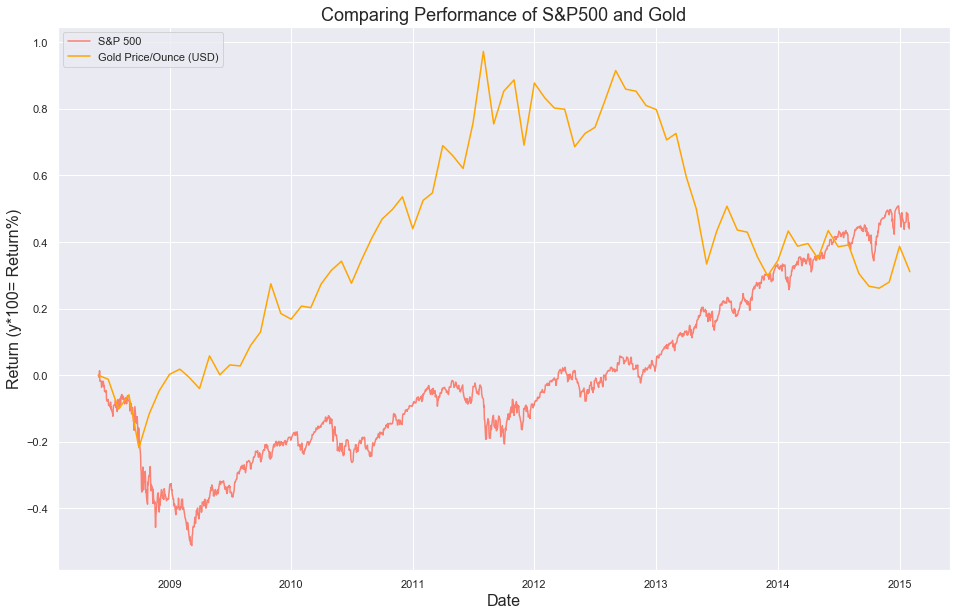

In [45]:

sns.set(rc={'figure.figsize':(16,10)})
fig,ax = plt.subplots()
ax.plot(SPY_QE1.Date, SPY_QE1.DailyReturn, color="salmon", label='S&P 500')
ax.plot(Gold_QE1.Date, Gold_QE1.DailyReturn, color="orange", label='Gold Price/Ounce (USD)')
plt.title("Comparing Performance of S&P500 and Gold", size=18)
plt.xlabel('Date',size=16)
plt.ylabel('Return (y*100= Return%)',size=16)
plt.legend(loc='upper left')

/Users/shiva.kandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


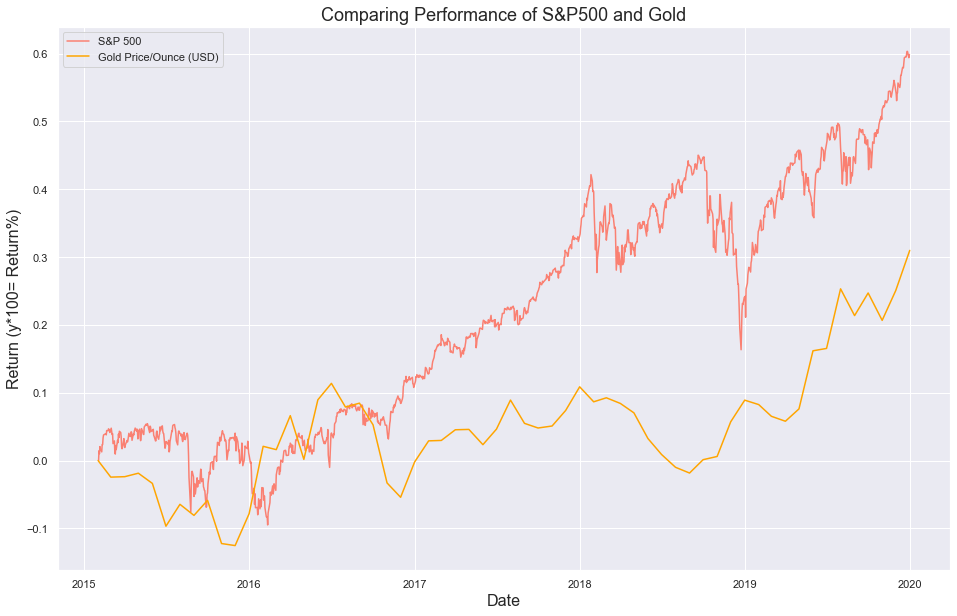

In [46]:
SPY_QT1 = compute_returns(SPY_daily, '2015-02-01', '2020-01-01')
Gold_QT1 = compute_returns(Gold_daily, '2015-02-01', '2020-01-01')

sns.set(rc={'figure.figsize':(16,10)})
fig,ax = plt.subplots()
ax.plot(SPY_QT1.Date, SPY_QT1.DailyReturn, color="salmon", label='S&P 500')
ax.plot(Gold_QT1.Date, Gold_QT1.DailyReturn, color="orange", label='Gold Price/Ounce (USD)')
plt.title("Comparing Performance of S&P500 and Gold", size=18)
plt.xlabel('Date',size=16)
plt.ylabel('Return (y*100= Return%)',size=16)
plt.legend(loc='upper left')

In [47]:
SPY_price.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Month,Year,Date_y,Dividends,Date,Actual_Price
0,1993-01-01,43.96875,43.96875,43.75000,43.93750,26.184059,1003200,1,1993,NaT,0.0,1993-01-01,43.93750
1,1993-02-01,43.96875,45.12500,42.81250,44.40625,26.463404,5417600,2,1993,NaT,0.0,1993-02-01,44.40625
2,1993-03-01,44.56250,45.84375,44.21875,45.18750,26.928963,3019200,3,1993,NaT,0.0,1993-03-01,45.18750
3,1993-04-01,45.25000,45.25000,43.28125,44.03125,26.363844,2697200,4,1993,NaT,0.0,1993-04-01,44.03125
4,1993-05-01,44.09375,45.65625,43.84375,45.21875,27.074867,1808000,5,1993,NaT,0.0,1993-05-01,45.21875


/Users/shiva.kandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


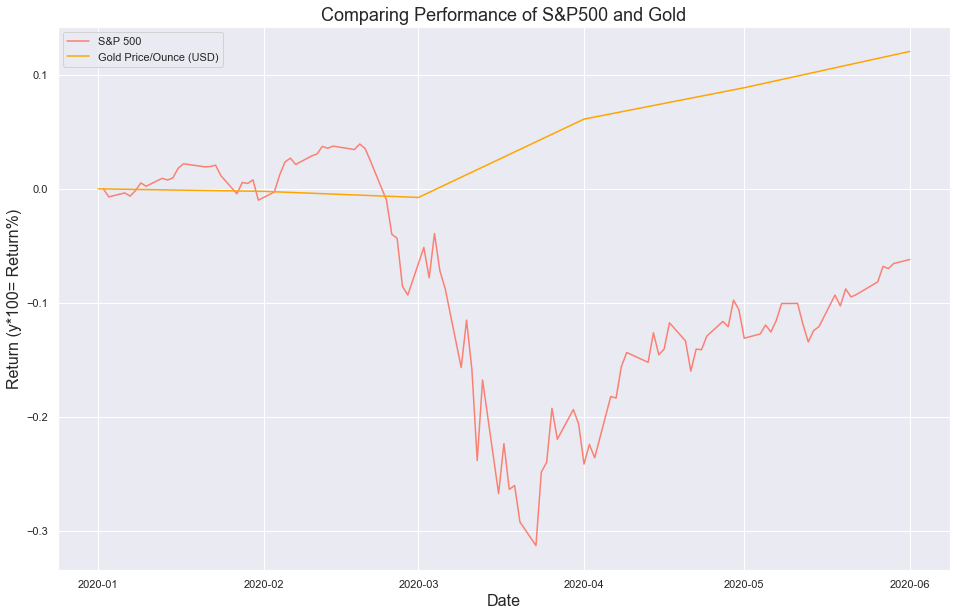

In [48]:
SPY_QE2 = compute_returns(SPY_daily, '2020-01-01', '2020-06-01')
Gold_QE2 = compute_returns(Gold_daily, '2020-01-01', '2020-06-01')

sns.set(rc={'figure.figsize':(16,10)})
fig,ax = plt.subplots()
ax.plot(SPY_QE2.Date, SPY_QE2.DailyReturn, color="salmon", label='S&P 500')
ax.plot(Gold_QE2.Date, Gold_QE2.DailyReturn, color="orange", label = 'Gold Price/Ounce (USD)')
plt.title("Comparing Performance of S&P500 and Gold", size=18)
plt.xlabel('Date',size=16)
plt.ylabel('Return (y*100= Return%)',size=16)
plt.legend(loc='upper left')

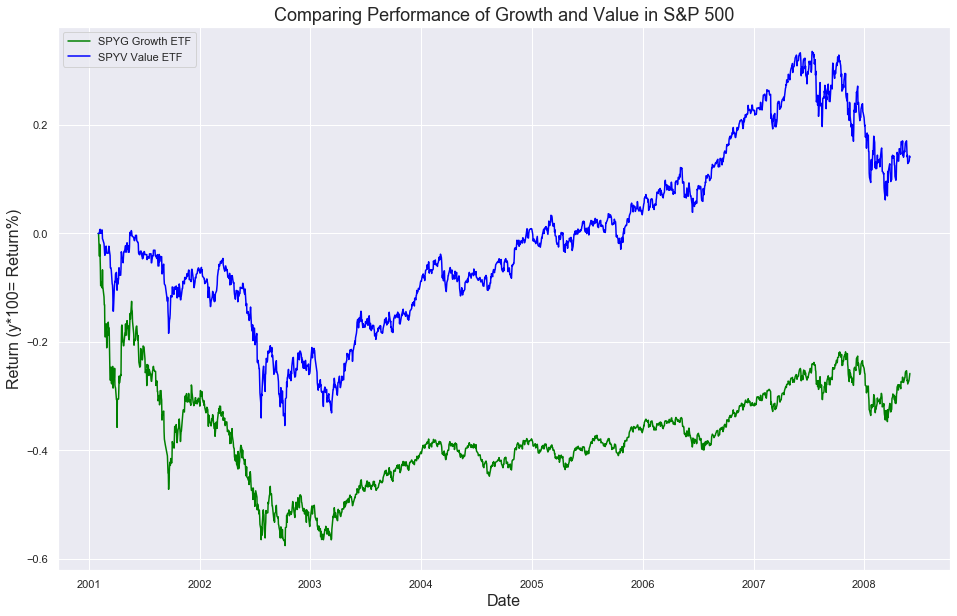

In [49]:
sns.set(rc={'figure.figsize':(16,10)})
fig,ax = plt.subplots()
ax.plot(SPYG_QT0.Date, SPYG_QT0.DailyReturn, color="green", label='SPYG Growth ETF')
ax.plot(SPYV_QT0.Date, SPYV_QT0.DailyReturn, color="blue", label='SPYV Value ETF')
plt.title("Comparing Performance of Growth and Value in S&P 500", size=18)
plt.xlabel('Date',size=16)
plt.ylabel('Return (y*100= Return%)',size=16)
plt.legend(loc='upper left')

Text(0, 0.5, 'Ratio')

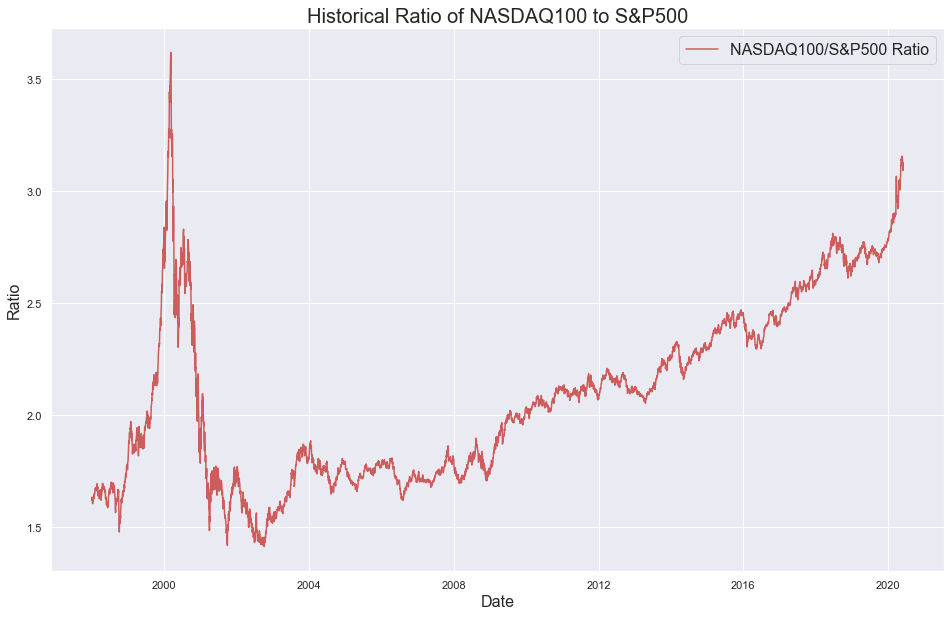

In [50]:
# QQQ_price_1998 = QQQ_price.loc[(QQQ_price['Date'] >= pd.to_datetime('1998-01-01'))&(QQQ_price['Date'] <= pd.to_datetime('2020-06-01'))]
# SPY_price_1998 = SPY_daily.loc[(SPY_daily['Date'] >= pd.to_datetime('1998-01-01'))&(SPY_daily['Date'] <= pd.to_datetime('2020-06-01'))]
# QQQ_SPY = pd.DataFrame({"Date":SPY_price_1998['Date'],
#                        "Ratio":QQQ_price_1998['Actual_Price']/SPY_price_1998['Actual_Price']})
QQQ_SPY = merge_loc_ret('1998-01-01','2020-06-15', SPY_daily, QQQ_price)
QQQ_SPY['Ratio'] = QQQ_SPY['Actual_Price_x']/QQQ_SPY['Actual_Price_y']
QQQ_SPY['Inverse_Ratio'] = QQQ_SPY['Actual_Price_y']/QQQ_SPY['Actual_Price_x']
sns.lineplot(x='Date',y='Inverse_Ratio',data=QQQ_SPY, label='NASDAQ100/S&P500 Ratio', color= 'indianred')
plt.title("Historical Ratio of NASDAQ100 to S&P500", size=20)
plt.legend(loc='upper right', fontsize=16)
plt.xlabel("Date", size=16)
plt.ylabel("Ratio", size=16)

In [51]:
QQQ_SPY.head(100)

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Actual_Price_x,DailyReturn,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Actual_Price_y,Ratio,Inverse_Ratio
0,1998-01-02,970.429993,975.039978,965.729980,975.039978,975.039978,366730000,975.039978,0.729285,1574.099976,1581.530029,1563.770020,1581.530029,1581.530029,434140000,1581.530029,0.616517,1.622016
1,1998-01-05,975.039978,982.630005,969.000000,977.070007,977.070007,628070000,977.070007,0.732885,1585.770020,1602.510010,1582.989990,1594.119995,1594.119995,681560000,1594.119995,0.612921,1.631531
2,1998-01-06,977.070007,977.070007,962.679993,966.580017,966.580017,618360000,966.580017,0.714281,1588.069946,1594.119995,1576.260010,1580.140015,1580.140015,635700000,1580.140015,0.611705,1.634774
3,1998-01-07,966.580017,966.580017,952.669983,964.000000,964.000000,667390000,964.000000,0.709705,1574.010010,1580.140015,1547.520020,1561.699951,1561.699951,691340000,1561.699951,0.617276,1.620021
4,1998-01-08,964.000000,964.000000,955.039978,956.049988,956.049988,652140000,956.049988,0.695605,1555.910034,1566.560059,1550.699951,1555.540039,1555.540039,645050000,1555.540039,0.614610,1.627049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1998-05-20,1109.520020,1119.079956,1107.510010,1119.060059,1119.060059,587240000,1119.060059,0.984712,1850.160034,1852.270020,1827.489990,1831.750000,1831.750000,674390000,1831.750000,0.610924,1.636865
96,1998-05-21,1119.060059,1124.449951,1111.939941,1114.640015,1114.640015,551970000,1114.640015,0.976873,1834.489990,1840.760010,1817.890015,1820.989990,1820.989990,681880000,1820.989990,0.612107,1.633702
97,1998-05-22,1114.640015,1116.890015,1107.989990,1110.469971,1110.469971,444070000,1110.469971,0.969477,1810.819946,1834.239990,1801.619995,1805.000000,1805.000000,637350000,1805.000000,0.615219,1.625438
98,1998-05-26,1110.469971,1116.790039,1094.010010,1094.020020,1094.020020,541410000,1094.020020,0.940302,1813.530029,1817.920044,1777.680054,1778.089966,1778.089966,676260000,1778.089966,0.615278,1.625281


/Users/shiva.kandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


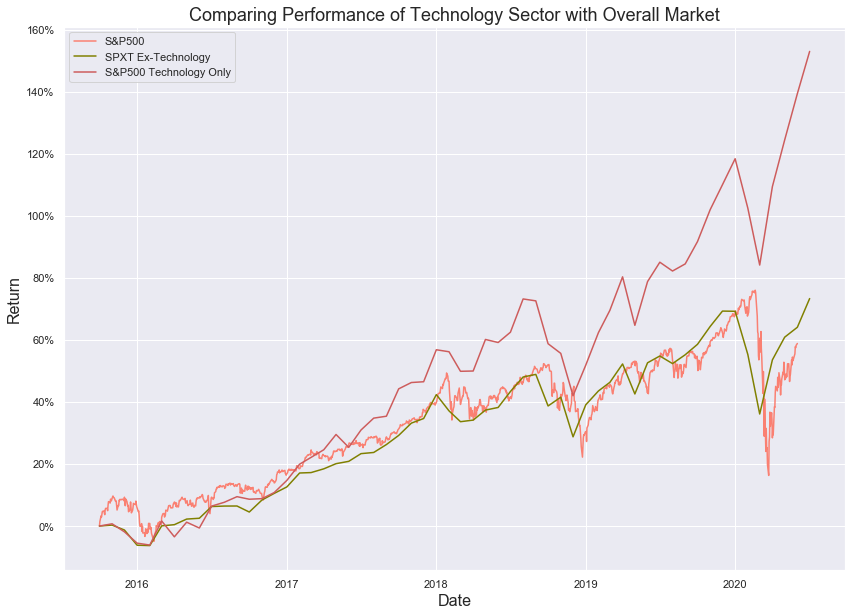

In [52]:
SPY_2015 = compute_returns(SPY_daily, '2015-10-01', '2020-07-01')
SPXT_2015 = compute_returns(SPXT_price, '2015-10-01', '2020-07-01')
XLK_2015 = compute_returns(XLK_price, '2015-10-01', '2020-07-01')

sns.set(rc={'figure.figsize':(14,10)})
fig,ax = plt.subplots()
ax.plot(SPY_2015.Date, SPY_2015.DailyReturn, color="salmon", label='S&P500')
ax.plot(SPXT_2015.Date, SPXT_2015.DailyReturn, color="olive",label='SPXT Ex-Technology')
ax.plot(SPXT_2015.Date, XLK_2015.DailyReturn, color="indianred", label='S&P500 Technology Only')
plt.title("Comparing Performance of Technology Sector with Overall Market", size=18)
plt.xlabel('Date',size=16)
plt.ylabel('Return',size=16)
plt.legend(loc='upper left')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))